# 缺失数据

In [1]:
import numpy as np
import pandas as pd

## 缺失值的统计和删除

### 缺失信息的统计
    缺失数据可以使用 isna 或 isnull （两个函数没有区别）来查看每个单元格是否缺失，结合 mean 可以计算出每列缺失值的比例

In [2]:
df = pd.read_csv('data/learn_pandas.csv',
                 usecols = ['Grade', 'Name', 'Gender', 'Height',
                            'Weight', 'Transfer'])
df.isna().head()

,Grade,Name,Gender,Height,Weight,Transfer
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,True,False,False
4,False,False,False,False,False,False


In [3]:
df.isnull().head()

,Grade,Name,Gender,Height,Weight,Transfer
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,True,False,False
4,False,False,False,False,False,False


    如果想要查看某一列缺失或者非缺失的行，可以利用 Series 上的 isna 或者 notna 进行布尔索引

In [6]:
# 例如，查看身高缺失的行
df[df.Height.isna()].head()

,Grade,Name,Gender,Height,Weight,Transfer
3,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N
12,Senior,Peng You,Female,NaN,48.0,NaN
26,Junior,Yanli You,Female,NaN,48.0,N
36,Freshman,Xiaojuan Qin,Male,NaN,79.0,Y
60,Freshman,Yanpeng Lv,Male,NaN,65.0,N


    如果想要同时对几个列，检索出全部为缺失或者至少有一个缺失或者没有缺失的行，可以使用 isna, notna 和 any, all 的组合

In [8]:
# 对身高、体重和转系情况这3列分别进行这三种情况的检索
df[df[['Height', 'Weight', 'Transfer']].isna().all(1)] # 全部缺失

,Grade,Name,Gender,Height,Weight,Transfer
102,Junior,Chengli Zhao,Male,NaN,NaN,NaN


In [9]:
df[df[['Height', 'Weight', 'Transfer']].isna().any(1)].head() # 至少有一个缺失

,Grade,Name,Gender,Height,Weight,Transfer
3,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N
9,Junior,Juan Xu,Female,164.8,NaN,N
12,Senior,Peng You,Female,NaN,48.0,NaN
21,Senior,Xiaopeng Shen,Male,166.0,62.0,NaN
26,Junior,Yanli You,Female,NaN,48.0,N


In [10]:
df[df[['Height', 'Weight', 'Transfer']].notna().all(1)].head() # 没有缺失

,Grade,Name,Gender,Height,Weight,Transfer
0,Freshman,Gaopeng Yang,Female,158.9,46.0,N
1,Freshman,Changqiang You,Male,166.5,70.0,N
2,Senior,Mei Sun,Male,188.9,89.0,N
4,Sophomore,Gaojuan You,Male,174.0,74.0,N
5,Freshman,Xiaoli Qian,Female,158.0,51.0,N


### 缺失信息的删除
###### dropna 的主要参数
    轴方向 axis （默认为0，即删除行）
    删除方式 how，主要有 any 和 all 两种参数可以选择
    删除的非缺失值个数阈值 thresh （ 非缺失值 没有达到这个数量的相应维度会被删除）
    备选的删除子集 subset

In [11]:
# 例如，删除身高体重至少有一个缺失的行
res = df.dropna(how = 'any', subset = ['Height', 'Weight'])
res.shape

(174, 6)

In [12]:
# 例如，删除超过15个缺失值的列
res = df.dropna(1, thresh=df.shape[0]-15) # 身高被删除
res.head()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_21544\3716673429.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  res = df.dropna(1, thresh=df.shape[0]-15) # 身高被删除


,Grade,Name,Gender,Weight,Transfer
0,Freshman,Gaopeng Yang,Female,46.0,N
1,Freshman,Changqiang You,Male,70.0,N
2,Senior,Mei Sun,Male,89.0,N
3,Sophomore,Xiaojuan Sun,Female,41.0,N
4,Sophomore,Gaojuan You,Male,74.0,N


In [13]:
# 使用布尔索引来完成
res = df.loc[:, ~(df.isna().sum()>15)]
res.head()

,Grade,Name,Gender,Weight,Transfer
0,Freshman,Gaopeng Yang,Female,46.0,N
1,Freshman,Changqiang You,Male,70.0,N
2,Senior,Mei Sun,Male,89.0,N
3,Sophomore,Xiaojuan Sun,Female,41.0,N
4,Sophomore,Gaojuan You,Male,74.0,N


## 缺失值的填充和插值

### 利用fillna进行填充
###### 三个常用的参数
    value 为填充值，可以是标量，也可以是索引到元素的字典映射
    method 为填充方法，有用前面的元素填充 ffill 和用后面的元素填充 bfill 两种类型
    limit 参数表示连续缺失值的最大填充次数

In [14]:
s = pd.Series([np.nan, 1, np.nan, np.nan, 2, np.nan],list('aaabcd'))

In [17]:
# 用前面的值向后填充
s.fillna(method='ffill')

a    NaN
a    1.0
a    1.0
b    1.0
c    2.0
d    2.0
dtype: float64

In [18]:
# 连续出现的缺失，最多填充一次
s.fillna(method='ffill', limit=1)

a    NaN
a    1.0
a    1.0
b    NaN
c    2.0
d    2.0
dtype: float64

In [20]:
# value为标量
s.fillna(s.mean())

a    1.5
a    1.0
a    1.5
b    1.5
c    2.0
d    1.5
dtype: float64

In [21]:
# 通过索引映射填充的值
s.fillna({'a': 100, 'd': 200}) 

a    100.0
a      1.0
a    100.0
b      NaN
c      2.0
d    200.0
dtype: float64

###### 有时为了更加合理地填充，需要先进行分组后再操作

In [22]:
# 例如，根据年级进行身高的均值填充
df.groupby('Grade')['Height'].transform(lambda x: x.fillna(x.mean())).head()

0    158.900000
1    166.500000
2    188.900000
3    163.075862
4    174.000000
Name: Height, dtype: float64

### 插值函数
    插值是个大学问，之后再研究

## Nullable类型

### 缺失记号及其缺陷
    在 python 中的缺失值用 None 表示，该元素除了等于自己本身之外，与其他任何元素不相等
    在 numpy 中利用 np.nan 来表示缺失值，该元素除了不和其他任何元素相等之外，和自身的比较结果也返回 False
    在时间序列的对象中， pandas 利用 pd.NaT 来指代缺失值，它的作用和 np.nan 是一致的

###### 那么为什么要引入 pd.NaT 来表示时间对象中的缺失呢？仍然以 np.nan 的形式存放会有什么问题？在 pandas 中可以看到 object 类型的对象，而 object 是一种混杂对象类型，如果出现了多个类型的元素同时存储在 Series 中，它的类型就会变成 object 。
###### NaT 问题的根源来自于 np.nan 的本身是一种浮点类型，而如果浮点和时间类型混合存储，如果不设计新的内置缺失类型来处理，就会变成含糊不清的 object 类型，这显然是不希望看到的。
###### pandas 尝试设计了一种新的缺失类型 pd.NA 以及三种 Nullable 序列类型来应对这些缺陷，它们分别是 Int, boolean 和 string 。

In [24]:
type(np.nan)

float

### Nullable类型的性质
    从字面意义上看 Nullable 就是可空的，言下之意就是序列类型不受缺失值的影响

In [25]:
pd.Series([np.nan, 1], dtype = 'Int64') # "i"是大写的

0    <NA>
1       1
dtype: Int64

In [26]:
pd.Series([np.nan, True], dtype = 'boolean')

0    <NA>
1    True
dtype: boolean

In [27]:
pd.Series([np.nan, 'my_str'], dtype = 'string')

0      <NA>
1    my_str
dtype: string

    对于 boolean 类型的序列而言，其和 bool 序列的行为主要有两点区别
    第一点是带有缺失的布尔列表无法进行索引器中的选择，而 boolean 会把缺失值看作 False

In [28]:
s = pd.Series(['a', 'b'])
s_bool = pd.Series([True, np.nan])
s_boolean = pd.Series([True, np.nan]).astype('boolean')
# s[s_bool] # 报错
s[s_boolean]

0    a
dtype: object

    第二点是在进行逻辑运算时， bool 类型在缺失处返回的永远是 False ，而 boolean 会根据逻辑运算是否能确定唯一结果来返回相应的值。那什么叫能否确定唯一结果呢？举个简单例子： True | pd.NA 中无论缺失值为什么值，必然返回 True ； False | pd.NA 中的结果会根据缺失值取值的不同而变化，此时返回 pd.NA ； False & pd.NA 中无论缺失值为什么值，必然返回 False 。

In [29]:
s_boolean & True

0    True
1    <NA>
dtype: boolean

In [30]:
s_boolean | True

0    True
1    True
dtype: boolean

In [31]:
~s_boolean

0    False
1     <NA>
dtype: boolean

###### <span class="mark">一般在实际数据处理时，可以在数据集读入后，先通过 convert_dtypes 转为 Nullable 类型</span>

### 缺失数据的计算和分组

    当调用函数 sum, prod 使用加法和乘法的时候，缺失数据等价于被分别视作0和1，即不改变原来的计算结果

In [32]:
s = pd.Series([2,3,np.nan,4,5])
print(s.sum(),s.prod())

14.0 120.0


    当使用累计函数时，会自动跳过缺失值所处的位置

In [33]:
s.cumsum()

0     2.0
1     5.0
2     NaN
3     9.0
4    14.0
dtype: float64

    当进行单个标量运算的时候，除了 np.nan ** 0 和 1 ** np.nan 这两种情况为确定的值之外，所有运算结果全为缺失（ pd.NA 的行为与此一致 ），并且 np.nan 在比较操作时一定返回 False ，而 pd.NA 返回 pd.NA 
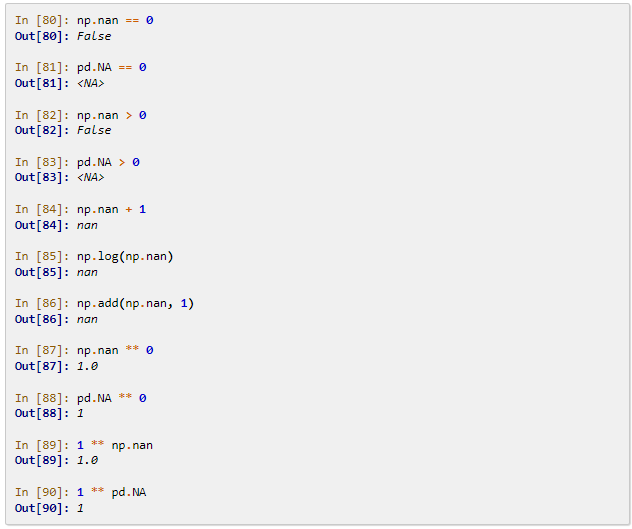

## 练习

### 缺失值与类别的相关性检验

In [39]:
df = pd.read_csv('data/missing_chi.csv')
df.head()

,X_1,X_2,y
0,NaN,NaN,0
1,NaN,NaN,0
2,NaN,NaN,0
3,43.0,NaN,0
4,NaN,NaN,0


In [35]:
df.isna().mean()

X_1    0.855
X_2    0.894
y      0.000
dtype: float64

In [37]:
df.y.value_counts(normalize=True)

0    0.918
1    0.082
Name: y, dtype: float64

In [44]:
cat_1 = df.X_1.fillna('NaN').mask(df.X_1.notna()).fillna("NotNaN")
cat_2 = df.X_2.fillna('NaN').mask(df.X_2.notna()).fillna("NotNaN")

In [46]:
df_1 = pd.crosstab(cat_1, df.y, margins=True)
df_2 = pd.crosstab(cat_2, df.y, margins=True)

In [49]:
def compute_S(my_df):
    S = []
    for i in range(2):
        for j in range(2):
            E = my_df.iat[i, j]
            F = my_df.iat[i, 2]*my_df.iat[2, j]/my_df.iat[2,2]
            S.append((E-F)**2/F)
    return sum(S)

res1 = compute_S(df_1)
res2 = compute_S(df_2)

In [50]:
from scipy.stats import chi2

print(chi2.sf(res1, 1)) # X_1检验的p值 # 不能认为相关，剔除

print(chi2.sf(res2, 1)) # X_2检验的p值 # 认为相关，保留

0.9712760884395901
7.459641265637543e-166
